In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler



In [6]:
#Booking_ID: unique identifier of each booking
#no_of_adults: Number of adults
#no_of_children: Number of Children
#no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#type_of_meal_plan: Type of meal plan booked by the customer:
#required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
#room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
#lead_time: Number of days between the date of booking and the arrival date
#arrival_year: Year of arrival date
#arrival_month: Month of arrival date
#arrival_date: Date of the month
#market_segment_type: Market segment designation.
#repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
#no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
#no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
#avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
#no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
#booking_status: Flag indicating if the booking was canceled or not.

In [7]:
#Online: Bookings made through online platforms (e.g., hotel websites, third-party sites).
#Offline: Bookings made through direct contact (e.g., phone, walk-in) or traditional travel agents.
#Corporate: Bookings made by companies for business purposes.
#Complementary: Free bookings given as promotions, rewards, or for partnerships.

# **Data Inspection and Initial Exploration**


In [9]:
df=pd.read_csv('hotel.csv')

In [10]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [11]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df.shape
print("number of rows:",df.shape[0])
print("number of columns:",df.shape[1])

number of rows: 36275
number of columns: 19


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# **Handling Missing Values and Dupplicated recored and Dropping the Booking_ID**

In [16]:
df.isna().sum()/df.shape[0]*100

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop('Booking_ID',axis=1,inplace=True)

# **Outlier Detection and Treatment**

In [20]:
numericalcol=df.select_dtypes(include=np.number).columns
categoricalcol=df.select_dtypes(exclude=np.number).columns

In [21]:
print(numericalcol)
print(categoricalcol)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


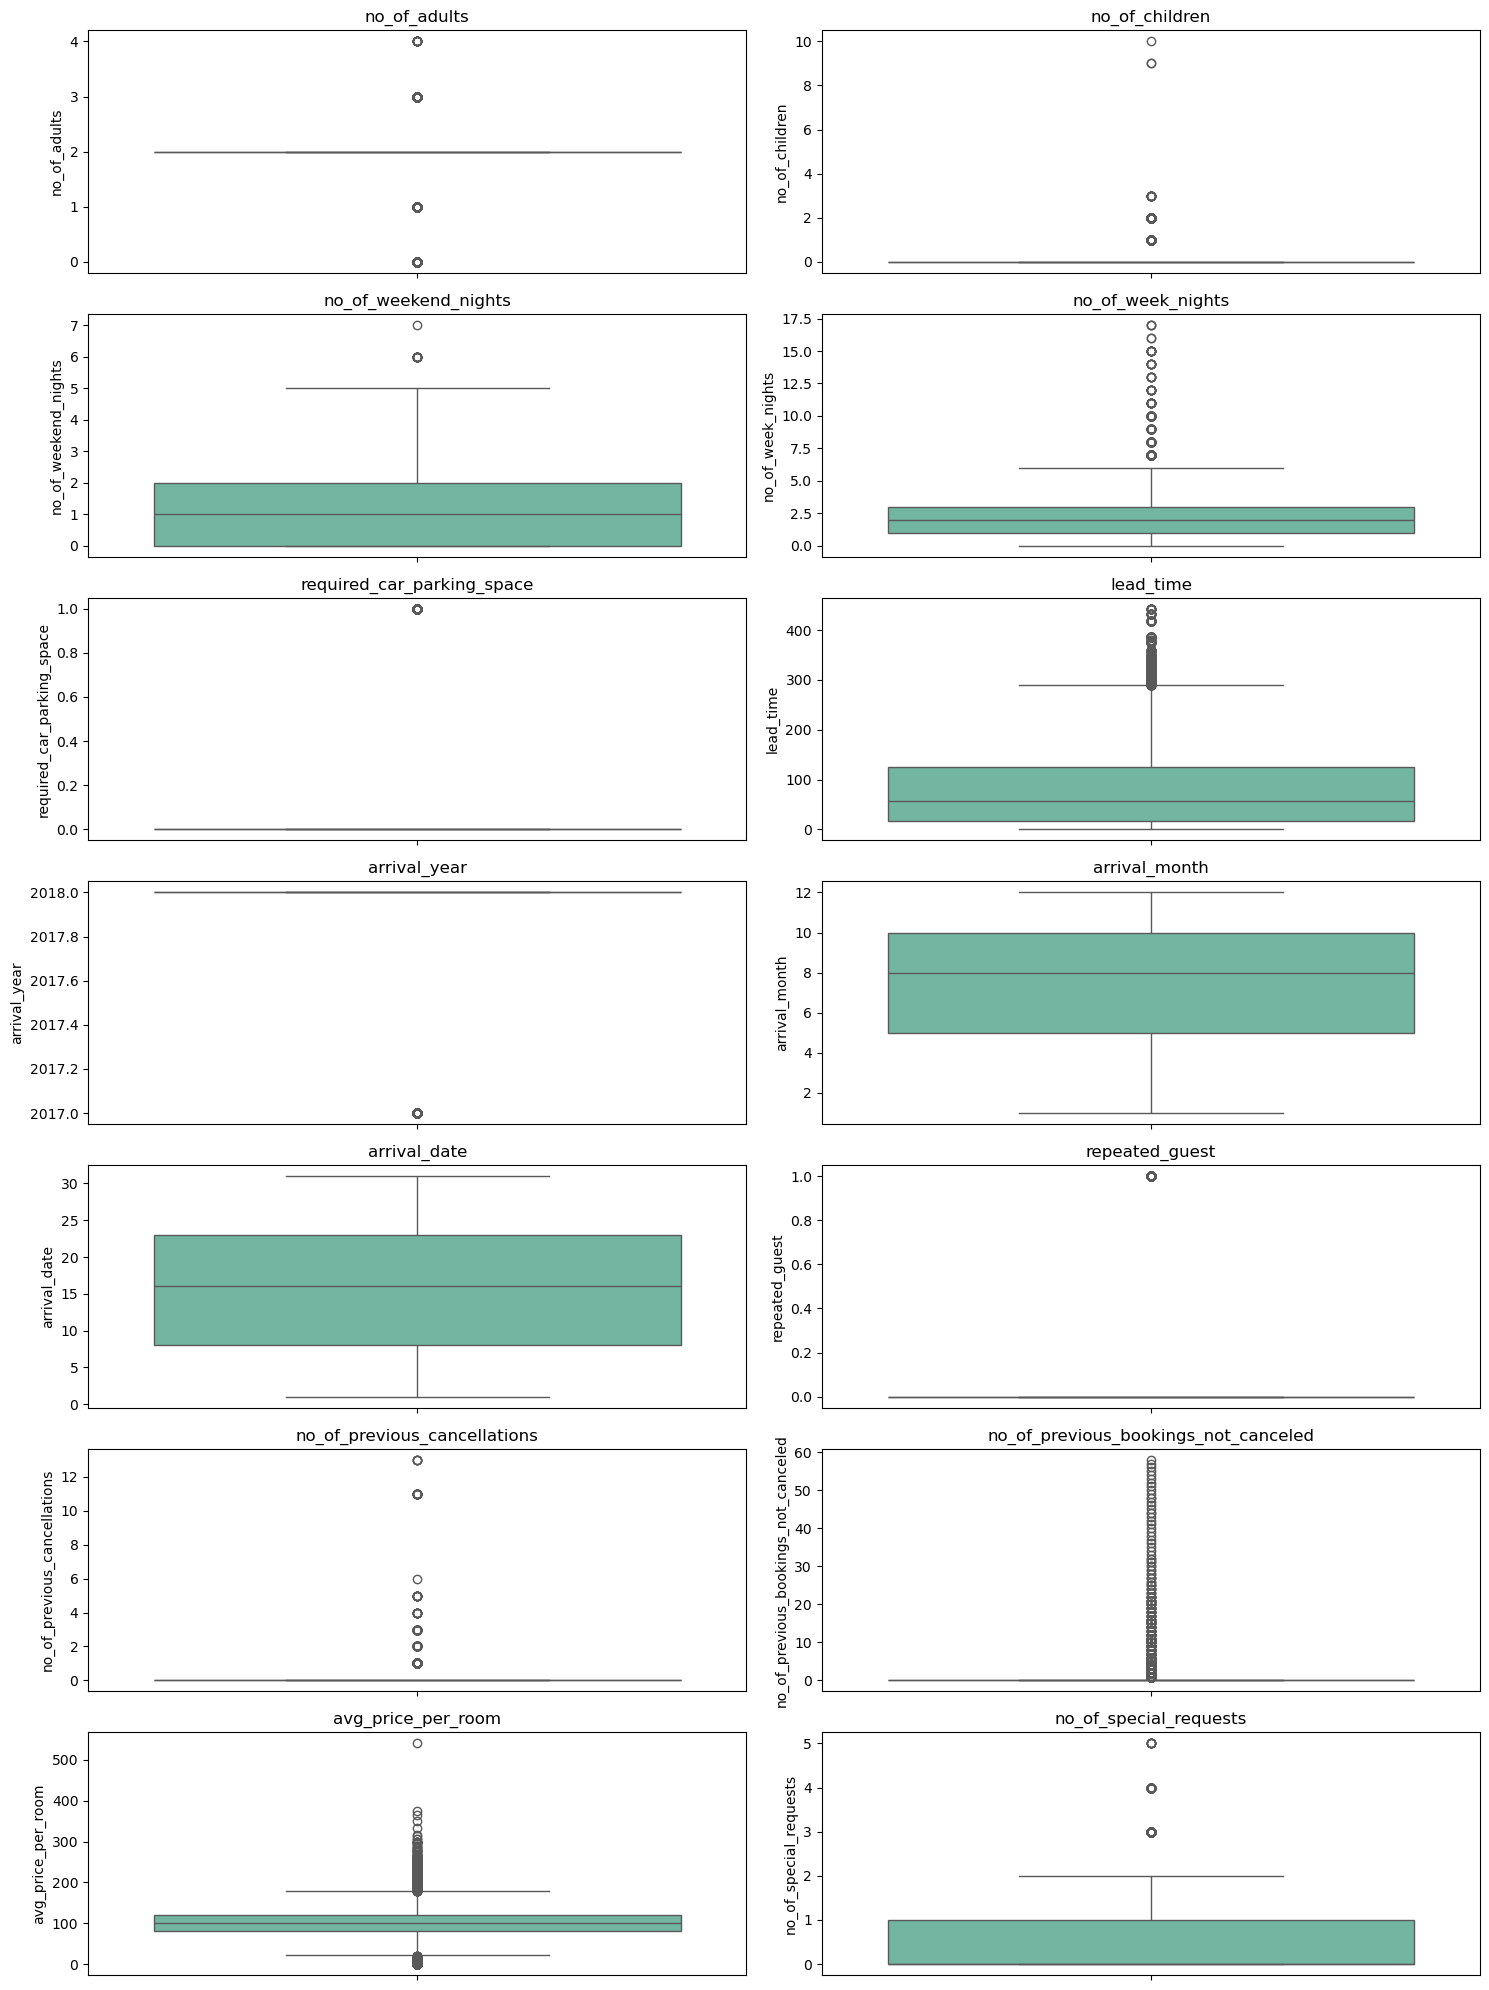

In [22]:
# Determine the number of numerical columns
num_columns = len(numericalcol)

# Calculate the number of rows needed (using integer division and ceiling if necessary)
rows = (num_columns // 2) + (num_columns % 2)

# Create the subplots with enough axes
fig, axes = plt.subplots(rows, 2, figsize=(15, 20))  # Adjust the 2 if you'd like more columns per row
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Set the color palette
palette = sns.color_palette("Set2")
for i, col in enumerate(numericalcol):
    sns.boxplot(y=df[col], ax=axes[i],palette=palette)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

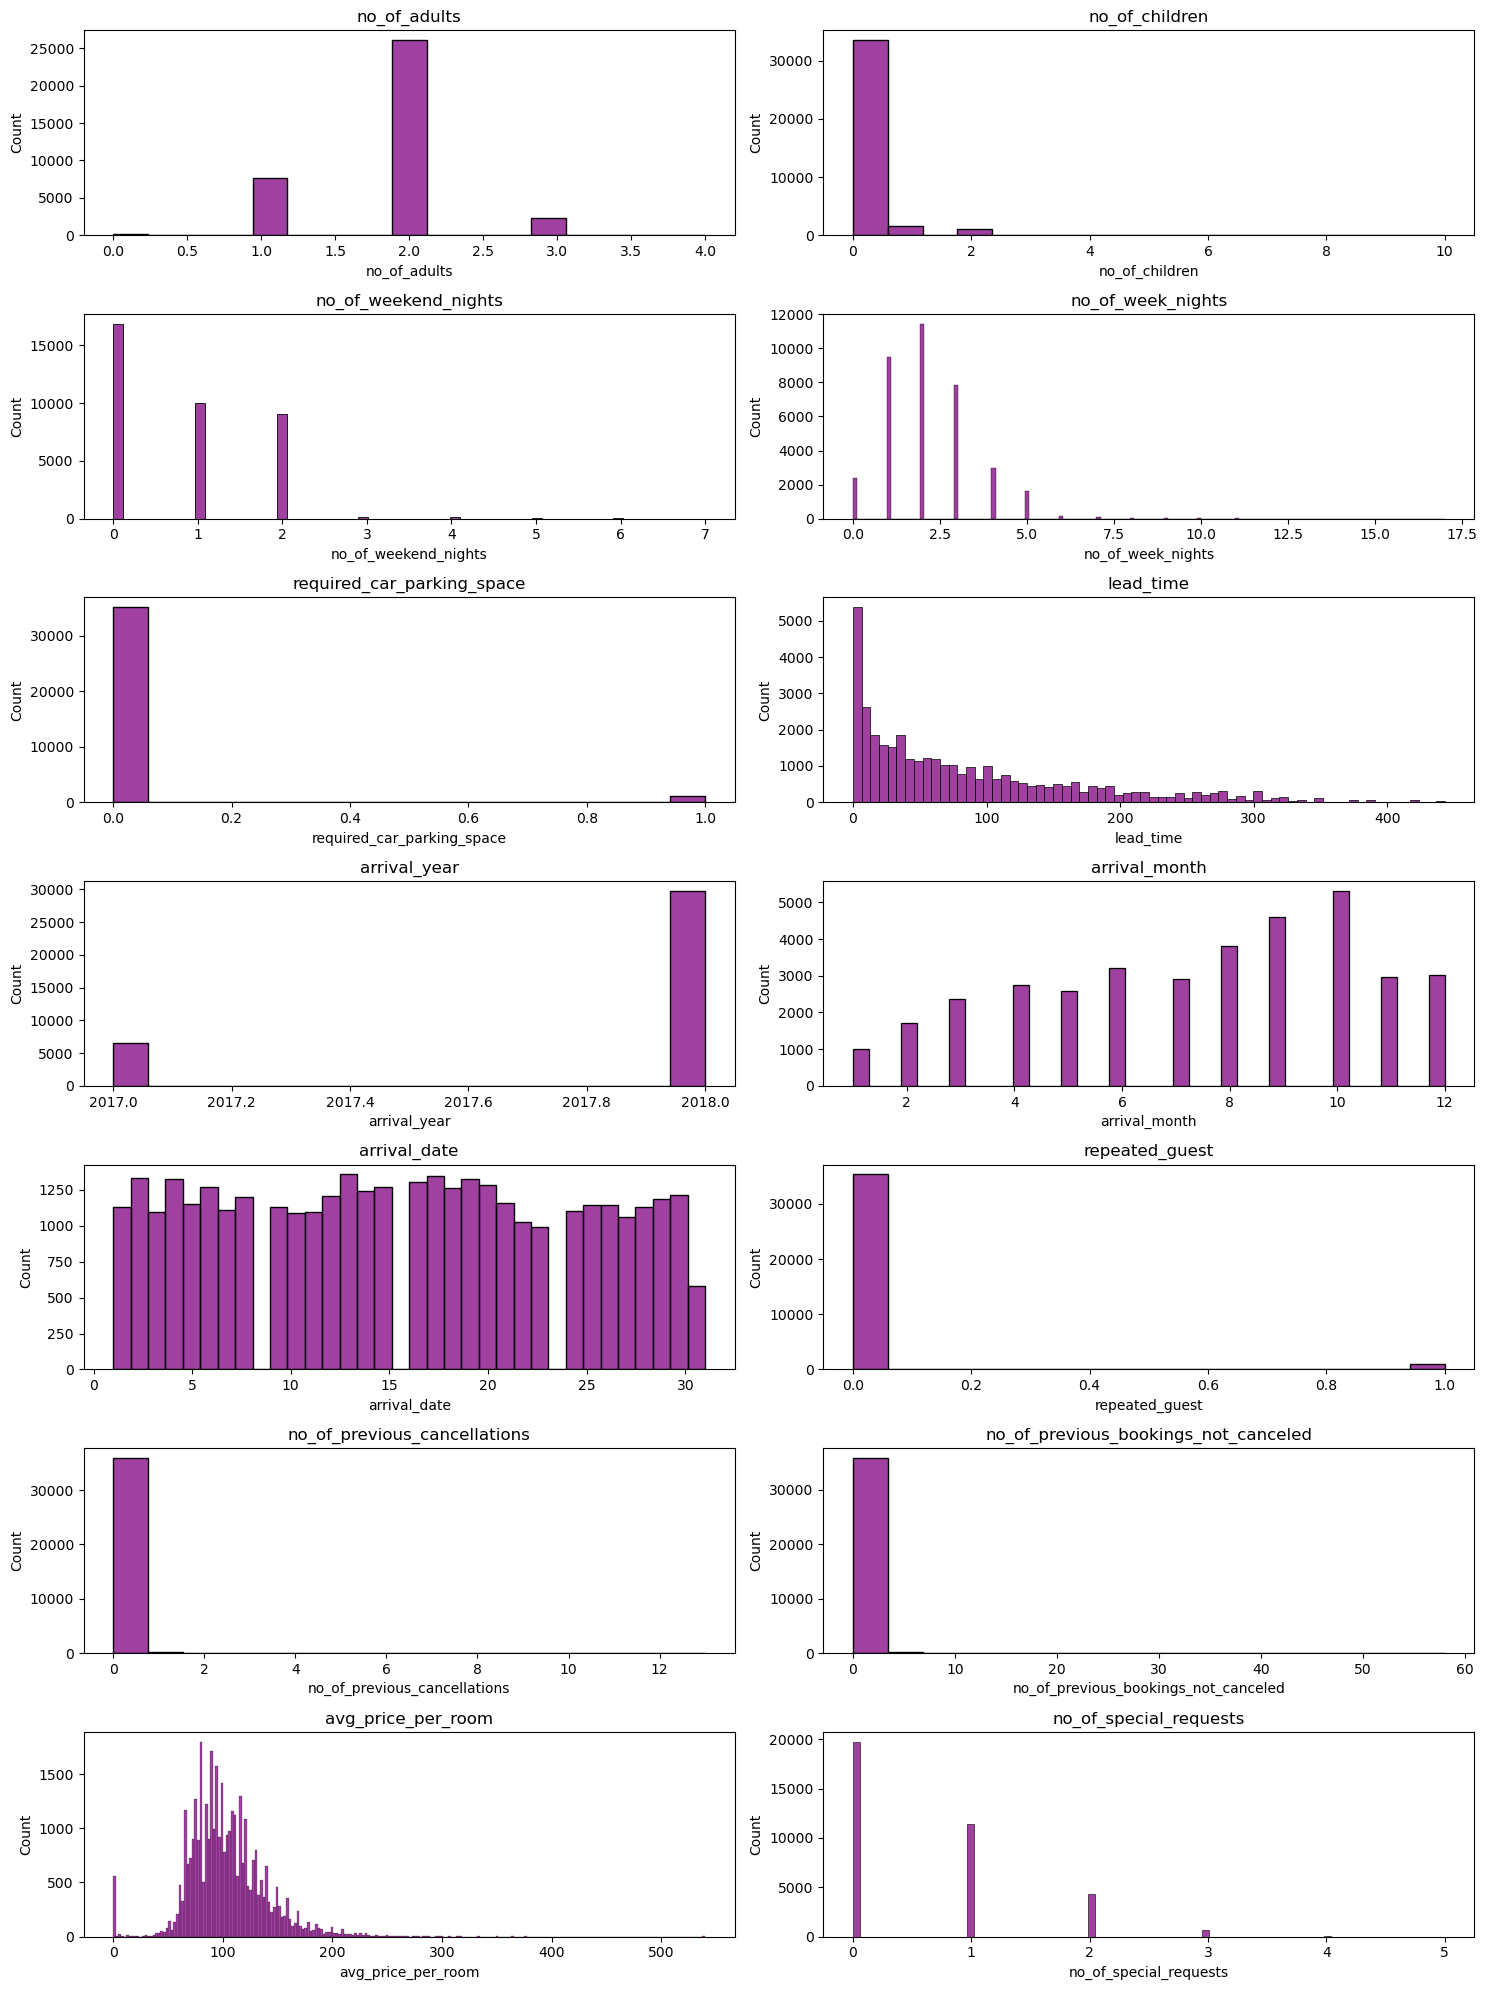

In [23]:
# Determine the number of numerical columns
num_columns = len(numericalcol)

# Calculate the number of rows needed (using integer division and ceiling if necessary)
rows = (num_columns // 2) + (num_columns % 2)

# Create the subplots with enough axes
fig, axes = plt.subplots(rows, 2, figsize=(15, 20))  # Adjust the 2 if you'd like more columns per row
axes = axes.flatten()  # Flatten the axes array for easier indexing


for i, col in enumerate(numericalcol):
    sns.histplot(df[col], ax=axes[i],color="purple")  # Make the x-axis the variable, y-axis the count
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [24]:
for col in numericalcol:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
  print(f"Column: {col}")
  print(f"Number of lower outliers: {outliers[outliers[col] < lower_bound].shape[0]}")
  print(f"Number of upper outliers: {outliers[outliers[col] > upper_bound].shape[0]}")
  num_outliers = outliers.shape[0] / df.shape[0]
  print(f"Proportion of outliers in {col}: {round(num_outliers, 3)}")
  print("*********************************************************")

Column: no_of_adults
Number of lower outliers: 7834
Number of upper outliers: 2333
Proportion of outliers in no_of_adults: 0.28
*********************************************************
Column: no_of_children
Number of lower outliers: 0
Number of upper outliers: 2698
Proportion of outliers in no_of_children: 0.074
*********************************************************
Column: no_of_weekend_nights
Number of lower outliers: 0
Number of upper outliers: 21
Proportion of outliers in no_of_weekend_nights: 0.001
*********************************************************
Column: no_of_week_nights
Number of lower outliers: 0
Number of upper outliers: 324
Proportion of outliers in no_of_week_nights: 0.009
*********************************************************
Column: required_car_parking_space
Number of lower outliers: 0
Number of upper outliers: 1124
Proportion of outliers in required_car_parking_space: 0.031
*********************************************************
Column: lead_time
Numbe

In [25]:
# - no_of_weekend_nights is capped at 2 since there are only 2 weekend days (Saturday and Sunday).
# - no_of_week_nights is capped at 5 since there are only 5 weekdays (Monday to Friday).

In [26]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ['no_of_week_nights', 'no_of_weekend_nights']
df = remove_outliers(df, columns)

# **Checking Data Consistency and Visualizing Categorical Distributions**

In [28]:
categoricalcol=df.select_dtypes(exclude=np.number).columns
print(categoricalcol)

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


In [29]:
for col in categoricalcol:
    print(df[col].value_counts())

type_of_meal_plan
Meal Plan 1     27570
Not Selected     5081
Meal Plan 2      3295
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    27911
Room_Type 4     5983
Room_Type 6      949
Room_Type 2      684
Room_Type 5      262
Room_Type 7      155
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           22935
Offline          10507
Corporate         2011
Complementary      388
Aviation           110
Name: count, dtype: int64
booking_status
Not_Canceled    24266
Canceled        11685
Name: count, dtype: int64


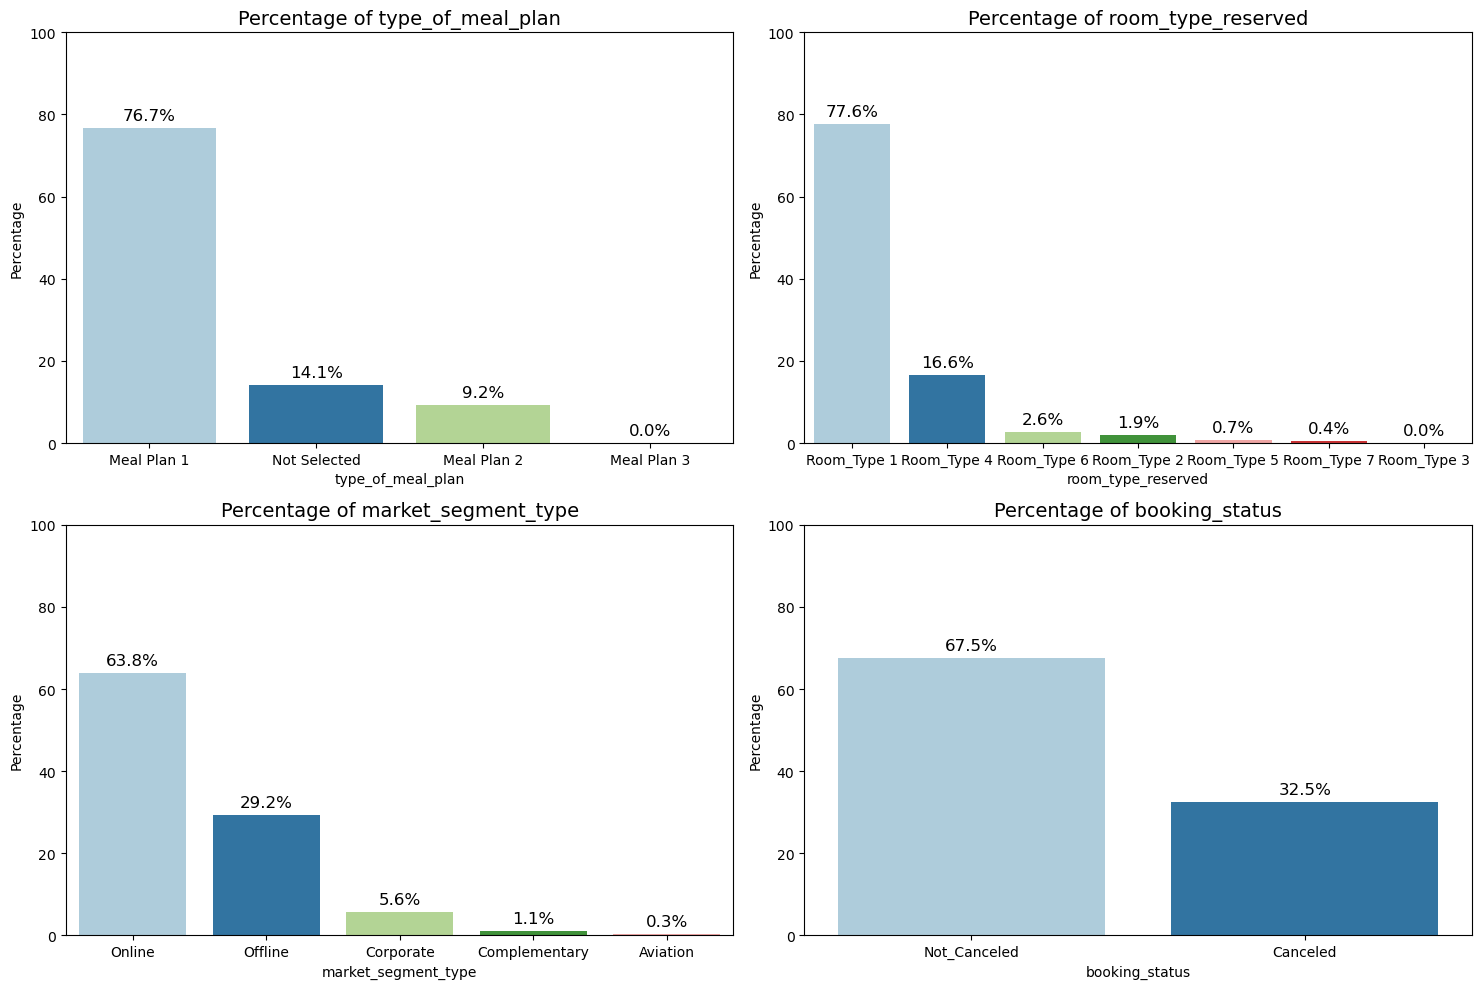

In [30]:
num_cols = 2
num_rows = (len(categoricalcol) + 1) // num_cols  # Add 1 to handle odd number of plots

# Define the figure size based on the number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each categorical column and create a bar plot with percentages
for i, col in enumerate(categoricalcol):
    counts = df[col].value_counts(normalize=True) * 100

    # Create a bar plot for the percentage
    sns.barplot(x=counts.index, y=counts.values, palette='Paired', ax=axes[i])
    axes[i].set_title(f'Percentage of {col}', fontsize=14)
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 100 for percentages

    # Display percentages on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=12, color='black',
                         xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()


# **Feature Engineering**

In [32]:
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

In [33]:
df['total_people'] = df['no_of_adults'] + df['no_of_children']

In [34]:
df['is_family'] = df['no_of_children'].apply(lambda x: 1 if x > 0 else 0)


# **Visualizing Relationships Between Variables**

In [36]:
numericalco=df.select_dtypes(include=np.number).columns
print(numericalco)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'total_nights',
       'total_people', 'is_family'],
      dtype='object')


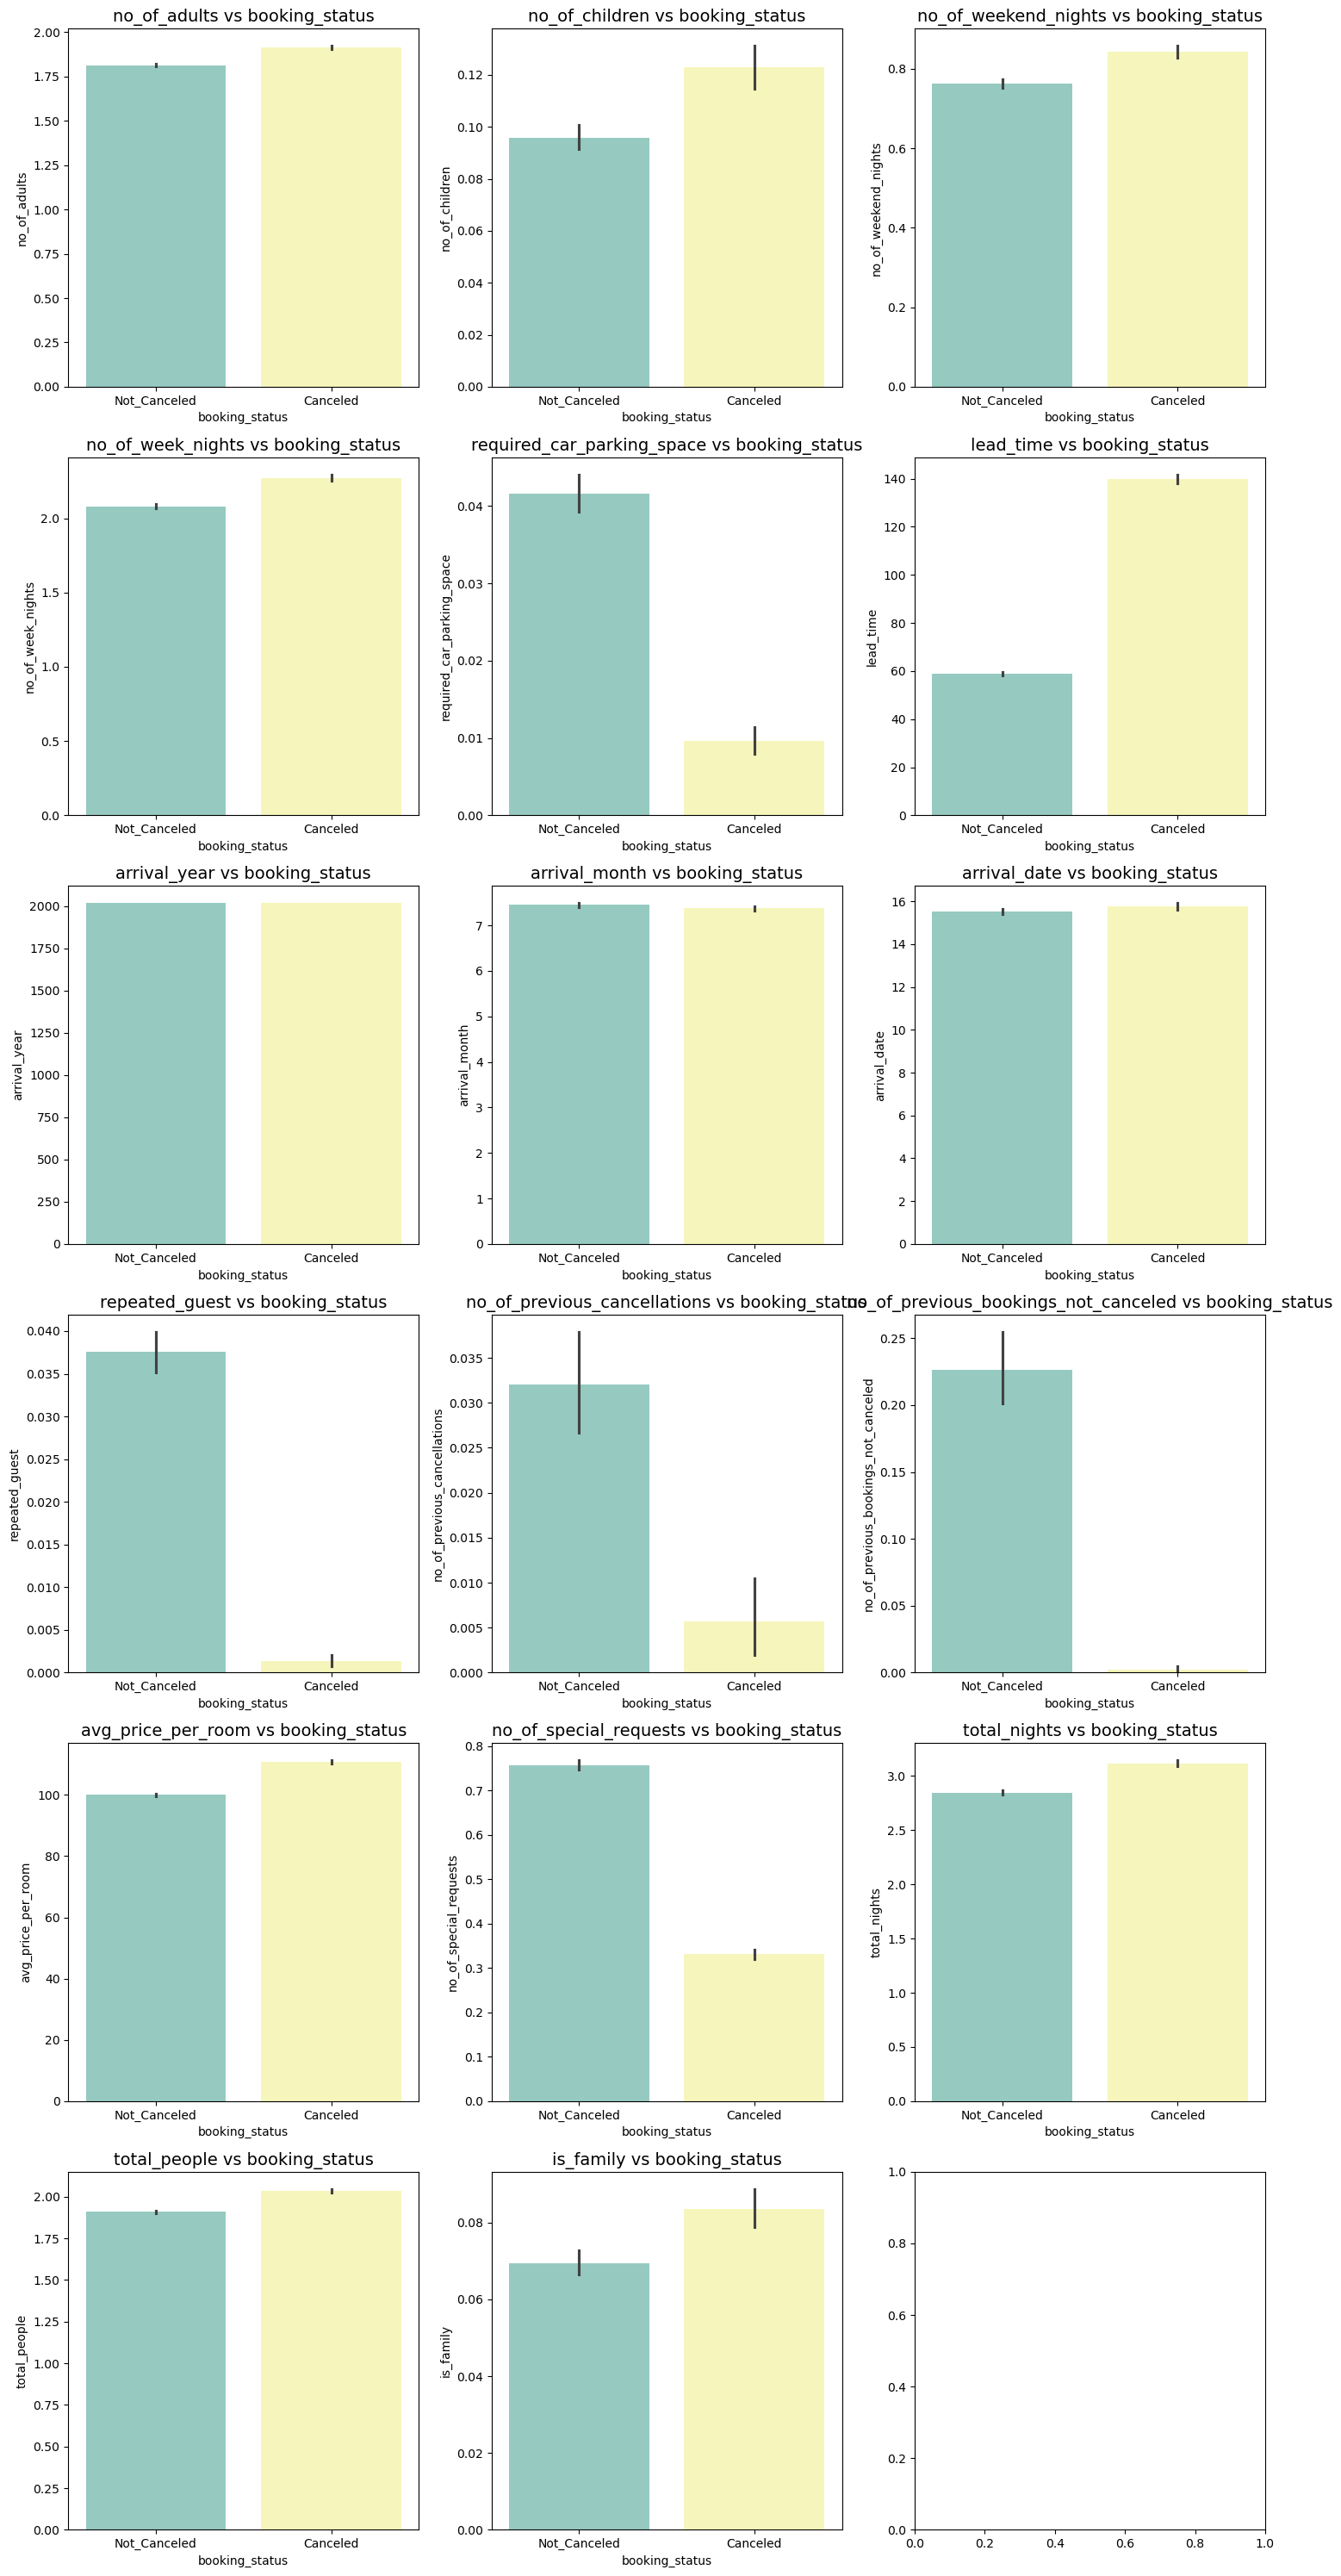

In [37]:
target_col = 'booking_status'
num_cols = 3
num_rows = (len(numericalco) + num_cols - 1) // num_cols  # This ensures we have enough rows

# Set up the figure and axes for multiple plots (3 plots per row)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical column and plot a bar plot against the target variable
for i, col in enumerate(numericalco):
    sns.barplot(data=df, x=target_col, y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{col} vs {target_col}', fontsize=14)
    axes[i].set_xlabel(target_col)
    axes[i].set_ylabel(col)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


# **Scaling Numerical Features and Encoding Categorical Features**

In [39]:
copydf=df.copy()
print(copydf.columns)
print(df.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'total_nights', 'total_people', 'is_family'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'total_nights', 'total_people', 'is_family'],
  

In [40]:
copydf['booking_status']=copydf['booking_status'].map({'Canceled':0,'Not_Canceled':1})


In [41]:
df['booking_status']=df['booking_status'].map({'Canceled':0,'Not_Canceled':1})

In [42]:
for i in categoricalcol:
    copydf=pd.concat([copydf,pd.get_dummies(copydf[i],drop_first=True,prefix=i)],axis=1)
    copydf.drop(i,axis=1,inplace=True)

In [43]:
for i in categoricalcol:
    df=pd.concat([df,pd.get_dummies(df[i],drop_first=True,prefix=i)],axis=1)
    print()
    df.drop(i,axis=1,inplace=True)

In [44]:
numericalcol=copydf.select_dtypes(include=np.number).columns
print(numericalcol)


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'total_nights',
       'total_people', 'is_family'],
      dtype='object')


In [45]:
for col in numericalcol:
    scaler=StandardScaler()
    copydf[col]=scaler.fit_transform(copydf[[col]])

In [46]:
copydf.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_1
0,0.297405,-0.260742,0.253753,-0.115254,-0.179401,1.614929,-2.136223,0.839754,-1.556877,-0.162689,...,False,False,False,False,False,False,False,True,False,True
1,0.297405,-0.260742,1.453156,0.688529,-0.179401,-0.933086,0.468116,1.165723,-1.099018,-0.162689,...,False,False,False,False,False,False,False,False,True,True
2,-1.633258,-0.260742,1.453156,-0.919038,-0.179401,-0.979625,0.468116,-1.768001,1.419205,-0.162689,...,False,False,False,False,False,False,False,False,True,False
3,0.297405,-0.260742,-0.945650,-0.115254,-0.179401,1.463677,0.468116,-0.790093,0.503487,-0.162689,...,False,False,False,False,False,False,False,False,True,False
4,0.297405,-0.260742,0.253753,-0.919038,-0.179401,-0.432791,0.468116,-1.116063,-0.526695,-0.162689,...,False,False,False,False,False,False,False,False,True,False


# **Implementing Machine Learning Algorithms**

In [48]:
X=copydf.drop('booking_status_1',axis=1)
y=copydf['booking_status_1']


In [49]:
copydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35951 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          35951 non-null  float64
 1   no_of_children                        35951 non-null  float64
 2   no_of_weekend_nights                  35951 non-null  float64
 3   no_of_week_nights                     35951 non-null  float64
 4   required_car_parking_space            35951 non-null  float64
 5   lead_time                             35951 non-null  float64
 6   arrival_year                          35951 non-null  float64
 7   arrival_month                         35951 non-null  float64
 8   arrival_date                          35951 non-null  float64
 9   repeated_guest                        35951 non-null  float64
 10  no_of_previous_cancellations          35951 non-null  float64
 11  no_of_previous_booki

In [50]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38825, 30)
(9707, 30)
(38825,)
(9707,)


In [146]:
results_=[]

In [53]:
xgb_grid={'n_estimators': [i for i in range(20,90,10)],
            'learning_rate': [0.1,0.6],
            'max_depth': [i for i in range(7,10)],
            'gamma': [ 0.1,0.2,0.3,0.4],
            'subsample': [ 0.6,0.7]}

In [54]:
xgb_model=XGBClassifier()
grid_search=GridSearchCV(xgb_model,xgb_grid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
grid_search.fit(x_train,y_train)
y_test_pred=grid_search.predict(x_test)
y_train_pred=grid_search.predict(x_train)
xgbbestparm=grid_search.best_params_
xgbscore=grid_search.best_score_
xgbtestaccuracy=accuracy_score(y_test,y_test_pred)
xgbtrainaccuracy=accuracy_score(y_train,y_train_pred)
xgbrecall=recall_score(y_test,y_test_pred)
xgbprecision=precision_score(y_test,y_test_pred)
xgbf1score=f1_score(y_test,y_test_pred)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


In [148]:
results_.append({
    'Model': 'XGBClassifier',
    'Train accuracy': xgbtrainaccuracy,
    'Test accuracy': xgbtestaccuracy,
    'Recall Score ': xgbrecall,
    'precision Score': xgbprecision,
    'f1 Score':xgbf1score,
    'Best Params':grid_search.best_params_
})

In [55]:
print(xgbbestparm)

{'gamma': 0.4, 'learning_rate': 0.6, 'max_depth': 9, 'n_estimators': 80, 'subsample': 0.7}


In [56]:
print("xgbtestaccuracy",xgbtestaccuracy)
print("xgbtrainaccuracy",xgbtrainaccuracy)

xgbtestaccuracy 0.9289172761924385
xgbtrainaccuracy 0.9879201545396008


In [57]:
lr_grid={'penalty':['l1','l2'],
                'C': [0.01, 0.1, 1, 10, 100]}

In [58]:
grid_lg=GridSearchCV(LogisticRegression(),lr_grid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
grid_lg.fit(x_train,y_train)
y_test_pred=grid_lg.predict(x_test)
y_train_pred=grid_lg.predict(x_train)
lgbestparm=grid_lg.best_params_
lgscore=grid_lg.best_score_
lgprecision=precision_score(y_test,y_test_pred)
lgtestaccuracy=accuracy_score(y_test,y_test_pred)
lgtrainaccuracy=accuracy_score(y_train,y_train_pred)
lgrecall=recall_score(y_test,y_test_pred)
lgf1score=f1_score(y_test,y_test_pred)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [150]:
results_.append({
    'Model': 'LogisticRegression',
    'Train accuracy': lgtrainaccuracy,
    'Test accuracy': lgtestaccuracy,
    'Recall Score ': lgrecall,
    'precision Score': lgprecision,
    'f1 Score':lgf1score,
    'Best Params':grid_lg.best_params_
})

In [59]:
print(lgtestaccuracy)
print(lgtrainaccuracy)

0.7771711136293397
0.7805280103026401


In [60]:
adaparam = {
    'n_estimators': [i for i in range(10, 100, 10)],  # 10 to 90 in steps of 10
    'algorithm': ['SAMME', 'SAMME.R']
}

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
adagrid=GridSearchCV(AdaBoostClassifier(),adaparam,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
adagrid.fit(x_train,y_train)
y_test_pred=adagrid.predict(x_test)
y_train_pred=adagrid.predict(x_train)
adabestparm=adagrid.best_params_
adabtrainaccuracy=accuracy_score(y_train,y_train_pred)
adabtestaccuracy=accuracy_score(y_test,y_test_pred)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [116]:
Adarecall=recall_score(y_test,y_test_pred)
Adaf1score=f1_score(y_test,y_test_pred)
Adaprecision=precision_score(y_test,y_test_pred)

In [152]:
results_.append({
    'Model': 'AdaBoostClassifier',
    'Train accuracy': adabtrainaccuracy,
    'Test accuracy': adabtestaccuracy,
    'Recall Score ': Adarecall,
    'precision Score': Adaprecision,
    'f1 Score':Adaf1score,
    'Best Params':adagrid.best_params_
})

In [63]:
print(adabtrainaccuracy)
print(adabtestaccuracy)

0.7995363811976819
0.799114041413413


In [64]:
grdient_grid={ 'n_estimators':[i for i in range(40,60,10)],
            'learning_rate': [0.2, 0.6],
            'max_depth': [i for i in range(5, 8)],
            'min_samples_split': [i for i in range(8, 15)],
            'min_samples_leaf': [i for i in range(8, 15)],
            'subsample': [0.5, 0.7]}
from sklearn.model_selection import GridSearchCV,cross_val_score

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gridgrient=GridSearchCV(GradientBoostingClassifier(),grdient_grid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
gridgrient.fit(x_train,y_train)
y_test_pred=gridgrient.predict(x_test)
y_train_pred=gridgrient.predict(x_train)
grdientbestparm=gridgrient.best_params_
grdientbestparm=gridgrient.best_score_
grdienttrainaccuracy=accuracy_score(y_train,y_train_pred)
grdienttestaccuracy=accuracy_score(y_test,y_test_pred)
grdientrecall=recall_score(y_test,y_test_pred)
grdientprecision=precision_score(y_test,y_test_pred)
grdientf1score=f1_score(y_test,y_test_pred)



Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


In [154]:
results_.append({
    'Model': 'GradientBoostingClassifier',
    'Train accuracy': grdienttrainaccuracy,
    'Test accuracy': grdienttestaccuracy,
    'Recall Score ': grdientrecall,
    'precision Score': grdientprecision,
    'f1 Score':grdientf1score,
    'Best Params':gridgrient.best_params_
})

In [67]:
print(grdienttrainaccuracy)
print(grdienttestaccuracy)

0.9528139085640696
0.9132584732667147


In [102]:
svmgrid={
    'kernel': [ 'poly', 'rbf'],
            'C': [0.001, 0.1, 1],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4]
}

In [104]:
svmgrid=GridSearchCV(SVC(),svmgrid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
svmgrid.fit(x_train,y_train)
y_test_pred=svmgrid.predict(x_test)
y_train_pred=svmgrid.predict(x_train)
svmbestparm=svmgrid.best_params_
svmscore=svmgrid.best_score_
svmtrainaccuracy=accuracy_score(y_train,y_train_pred)
svmtestaccuracy=accuracy_score(y_test,y_test_pred)
svmrecall=recall_score(y_test,y_test_pred)
svmprecision=precision_score(y_test,y_test_pred)
svmf1score=f1_score(y_test,y_test_pred)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [156]:
results_.append({
    'Model': 'SVC',
    'Train accuracy': svmtrainaccuracy,
    'Test accuracy': svmtestaccuracy,
    'Recall Score ': svmrecall,
    'precision Score': svmprecision,
    'f1 Score':svmf1score,
    'Best Params':svmgrid.best_params_
})

In [106]:
print(svmtrainaccuracy)
print(svmtestaccuracy)

0.8414938828074694
0.8291954259812506


In [76]:
knngrid={'n_neighbors':[i for i in range(1,20)],
            'weights':['uniform','distance']}

In [128]:
knngrid_=GridSearchCV(KNeighborsClassifier(),knngrid,cv=5,verbose=3,n_jobs=-1)
knngrid_.fit(x_train,y_train)
y_test_pred=knngrid_.predict(x_test)
y_train_pred=knngrid_.predict(x_train)
knnbestparm=knngrid_.best_params_
knnscore=knngrid_.best_score_
knntrainaccuracy=accuracy_score(y_train,y_train_pred)
knntestaccuracy=accuracy_score(y_test,y_test_pred)
knntrecall=recall_score(y_test,y_test_pred)
knntprecision=precision_score(y_test,y_test_pred)
knnf1score=f1_score(y_test,y_test_pred)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


In [158]:
results_.append({
    'Model': 'KNeighborsClassifier',
    'Train accuracy': knntrainaccuracy,
    'Test accuracy': knntestaccuracy,
    'Recall Score ': knntrecall,
    'precision Score': knntprecision,
    'f1 Score':knnf1score,
    'Best Params':knngrid_.best_params_
})

In [79]:
print(knntrainaccuracy)
print(knntestaccuracy)
knnbestparm

0.9936381197681906
0.9033687029978366


{'n_neighbors': 14, 'weights': 'distance'}

In [82]:
dtgrid={ 'criterion':['gini','entropy'],
            'max_depth':[i for i in range(10,60,10)],
            'min_samples_split':[i for i in range(2,10,2)],
            'min_samples_leaf':[i for i in range(2,10,1)],
            'max_features':['auto','sqrt','log2'],}

In [84]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),dtgrid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
dt_grid.fit(x_train,y_train)
y_test_pred=dt_grid.predict(x_test)
y_train_pred=dt_grid.predict(x_train)
dtbestparm=dt_grid.best_params_
dtscore=dt_grid.best_score_
dttrainaccuracy=accuracy_score(y_train,y_train_pred)
dttestaccuracy=accuracy_score(y_test,y_test_pred)
dtrecall=recall_score(y_test,y_test_pred)
dtprecision=precision_score(y_test,y_test_pred)
dtf1score=f1_score(y_test,y_test_pred)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


In [160]:
results_.append({
    'Model': 'DecisionTreeClassifier',
    'Train accuracy': dttrainaccuracy,
    'Test accuracy': dttestaccuracy,
    'Recall Score ': dtrecall,
    'precision Score': dtprecision,
    'f1 Score':dtf1score,
    'Best Params':dt_grid.best_params_
})

In [85]:
print(dttrainaccuracy)
print(dttestaccuracy)

0.9402446877012235
0.8803955908107551


In [88]:
rdgrid={ 'n_estimators':[i for i in range(50,100,10)],
            'criterion':['gini','entropy'],
            'max_depth':[i for i in range(30,60,10)],
            'min_samples_split':[i for i in range(2,10,2)],
            'min_samples_leaf':[i for i in range(2,10,1)],
            'bootstrap':[True,False]

}

In [90]:
rdgrid_=GridSearchCV(RandomForestClassifier(),rdgrid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
rdgrid_.fit(x_train,y_train)



Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='accuracy', verbose=3)

In [92]:
rdscore=rdgrid_.best_score_
rdtrainaccuracy=accuracy_score(y_train,y_train_pred)
rdtestaccuracy=accuracy_score(y_test,y_test_pred)
rdrecall=recall_score(y_test,y_test_pred)
rdprecision=precision_score(y_test,y_test_pred)
rdf1score=f1_score(y_test,y_test_pred)


In [162]:
results_.append({
    'Model': 'RandomForestClassifier',
    'Train accuracy': rdtrainaccuracy,
    'Test accuracy':rdtestaccuracy ,
    'Recall Score ': rdrecall,
    'precision Score': rdprecision,
    'f1 Score':rdf1score,
    'Best Params':rdgrid_.best_params_
})

In [94]:
print(rdtrainaccuracy)
print(rdtestaccuracy)

0.9402446877012235
0.8803955908107551


In [96]:
nvgrid={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]}

In [98]:
nvgrid_=GridSearchCV(GaussianNB(),nvgrid,cv=5,verbose=3,n_jobs=-1,scoring='accuracy')
nvgrid_.fit(x_train,y_train)
nvbestparm=nvgrid_.best_params_
nvscore=nvgrid_.best_score_
nvtrainaccuracy=accuracy_score(y_train,y_train_pred)
nvtestaccuracy=accuracy_score(y_test,y_test_pred)
nvrecall=recall_score(y_test,y_test_pred)
nvprecision=precision_score(y_test,y_test_pred)
nvf1score=f1_score(y_test,y_test_pred)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [99]:
print(nvtrainaccuracy)
print(nvtestaccuracy)

0.9402446877012235
0.8803955908107551


In [164]:
results_.append({
    'Model': 'GaussianNB',
    'Train accuracy': nvtrainaccuracy,
    'Test accuracy':nvtestaccuracy ,
    'Recall Score ': nvrecall,
    'precision Score': nvprecision,
    'f1 Score':nvf1score,
    'Best Params':nvbestparm
})

In [166]:
results_df=pd.DataFrame(results_)


In [170]:
pd.set_option('display.max_colwidth', None)

In [172]:
results_df

,Model,Train accuracy,Test accuracy,Recall Score,precision Score,f1 Score,Best Params
0,XGBClassifier,0.987920,0.928917,0.908203,0.949160,0.928230,"{'gamma': 0.4, 'learning_rate': 0.6, 'max_depth': 9, 'n_estimators': 80, 'subsample': 0.7}"
1,LogisticRegression,0.780528,0.777171,0.784246,0.777441,0.780829,"{'C': 0.1, 'penalty': 'l2'}"
2,AdaBoostClassifier,0.799536,0.799114,0.812335,0.795178,0.803665,"{'algorithm': 'SAMME.R', 'n_estimators': 90}"
3,GradientBoostingClassifier,0.952814,0.913258,0.900265,0.926283,0.913088,"{'learning_rate': 0.6, 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 50, 'subsample': 0.7}"
4,SVC,0.841494,0.829195,0.828618,0.833026,0.830816,"{'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}"
5,KNeighborsClassifier,0.993638,0.903369,0.845715,0.958478,0.898573,"{'n_neighbors': 14, 'weights': 'distance'}"
6,DecisionTreeClassifier,0.940245,0.880396,0.847547,0.909965,0.877648,"{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}"
7,RandomForestClassifier,0.940245,0.880396,0.847547,0.909965,0.877648,"{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}"
8,GaussianNB,0.940245,0.880396,0.847547,0.909965,0.877648,{'var_smoothing': 0.1}


In [ ]:
###best Performing Model:GradientBoostingClassifier

In [ ]:
gridgrient.fit(x_train,y_train)
y_test_pred=gridgrient.predict(x_test)
y_train_pred=gridgrient.predict(x_train)

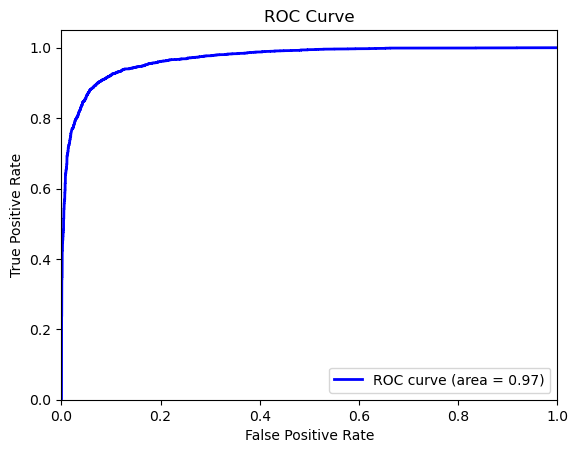

In [180]:
y_prob = gridgrient.predict_proba(x_test)[:, 1]  # Keep probabilities for the positive class only
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [176]:
from sklearn.metrics import roc_curve, auc